In [1]:
import pandas as pd

df = pd.read_csv('../input/train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [39]:
ser_counts = df.groupby('ImageId').size()
ser_counts.head(10)

ImageId
00003e153.jpg    1
0001124c7.jpg    1
000155de5.jpg    1
000194a2d.jpg    5
0001b1832.jpg    1
00021ddc3.jpg    9
0002756f7.jpg    2
0002d0f32.jpg    1
000303d4d.jpg    1
00031f145.jpg    1
dtype: int64

In [87]:
print(f'Number of unique images: {ser_counts.size}')

Number of unique images: 192556


In [62]:
df_counts = ser_counts.reset_index(name='ship_count')
df_counts.head()

,ImageId,ship_count
0,00003e153.jpg,1
1,0001124c7.jpg,1
2,000155de5.jpg,1
3,000194a2d.jpg,5
4,0001b1832.jpg,1


In [63]:
df_counts.loc[df_counts.ship_count == 1].shape

(177104, 2)

Out of the 177,104 entries, 150,000 have no ships in them. We set the `ship_count` of these entries to 0.

In [64]:
images_wo_ships = df[df.EncodedPixels.isnull()].ImageId.values
print(images_wo_ships)

['00003e153.jpg' '0001124c7.jpg' '0001b1832.jpg' ... 'ffff6e525.jpg'
 'ffffc50b4.jpg' 'ffffe97f3.jpg']


In [70]:
df_counts.loc[df_counts.ImageId.isin(images_wo_ships), 'ship_count'] = 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbec6af6d8>]],
      dtype=object)

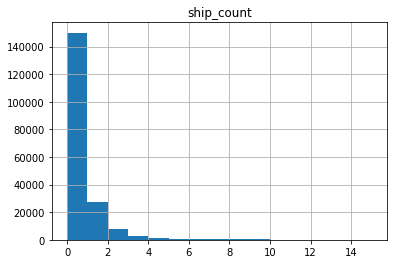

In [76]:
df_counts.hist(column='ship_count', bins=15)

In [164]:
def compute_count_distribution(dataframe):
    new_df = dataframe.groupby('ship_count').size().reset_index(name='number_of_samples')
    total_samples = new_df.number_of_samples.sum()
    new_df['percentage'] = new_df.apply(lambda x: 100*x.number_of_samples/total_samples, axis='columns')
    print(new_df)
    print(f'Total number of samples: {total_samples}')
    return new_df

compute_count_distribution(df_counts)

    ship_count  number_of_samples  percentage
0            0             150000   77.899416
1            1              27104   14.075905
2            2               7674    3.985334
3            3               2954    1.534099
4            4               1622    0.842352
5            5                925    0.480380
6            6                657    0.341199
7            7                406    0.210848
8            8                318    0.165147
9            9                243    0.126197
10          10                168    0.087247
11          11                144    0.074783
12          12                124    0.064397
13          13                 75    0.038950
14          14                 76    0.039469
15          15                 66    0.034276
Total number of samples: 192556


,ship_count,number_of_samples,percentage
0,0,150000,77.899416
1,1,27104,14.075905
2,2,7674,3.985334
3,3,2954,1.534099
4,4,1622,0.842352
5,5,925,0.480380
6,6,657,0.341199
7,7,406,0.210848
8,8,318,0.165147
9,9,243,0.126197


In [165]:
from sklearn.model_selection import train_test_split

train_ids, test_ids = train_test_split(df_counts)

print('Training data distribution')
train_stats = compute_count_distribution(train_ids)

print('Test data distribution')
test_stats = compute_count_distribution(test_ids)

Training data distribution
    ship_count  number_of_samples  percentage
0            0             112504   77.902186
1            1              20288   14.048208
2            2               5789    4.008531
3            3               2185    1.512980
4            4               1237    0.856547
5            5                717    0.496479
6            6                499    0.345527
7            7                288    0.199423
8            8                238    0.164801
9            9                180    0.124639
10          10                117    0.081015
11          11                106    0.073399
12          12                 98    0.067859
13          13                 51    0.035314
14          14                 62    0.042931
15          15                 58    0.040161
Total number of samples: 144417
Test data distribution
    ship_count  number_of_samples  percentage
0            0              37496   77.891107
1            1               6816   14.15899

In [172]:
df_merged = pd.merge(train_stats, test_stats, suffixes=('_train', '_test'), on='ship_count')
df_merged['train_test_ratio'] = df_merged.apply(lambda x: x.number_of_samples_train / (x.number_of_samples_train + x.number_of_samples_test), axis='columns')
df_merged

,ship_count,number_of_samples_train,percentage_train,number_of_samples_test,percentage_test,train_test_ratio
0,0,112504,77.902186,37496,77.891107,0.750027
1,1,20288,14.048208,6816,14.158998,0.748524
2,2,5789,4.008531,1885,3.915744,0.754365
3,3,2185,1.512980,769,1.597457,0.739675
4,4,1237,0.856547,385,0.799767,0.762639
5,5,717,0.496479,208,0.432082,0.775135
6,6,499,0.345527,158,0.328216,0.759513
7,7,288,0.199423,118,0.245123,0.709360
8,8,238,0.164801,80,0.166185,0.748428
9,9,180,0.124639,63,0.130871,0.740741


Now, we do the train/test split with stratify to see if it affects the train/test ratio.

In [173]:
train_ids, test_ids = train_test_split(df_counts, stratify=df_counts.ship_count)

print('Training data distribution')
train_stats = compute_count_distribution(train_ids)

print('Test data distribution')
test_stats = compute_count_distribution(test_ids)

Training data distribution
    ship_count  number_of_samples  percentage
0            0             112500   77.899416
1            1              20328   14.075905
2            2               5755    3.984988
3            3               2216    1.534445
4            4               1216    0.842006
5            5                694    0.480553
6            6                493    0.341373
7            7                305    0.211194
8            8                238    0.164801
9            9                182    0.126024
10          10                126    0.087247
11          11                108    0.074783
12          12                 93    0.064397
13          13                 56    0.038777
14          14                 57    0.039469
15          15                 50    0.034622
Total number of samples: 144417
Test data distribution
    ship_count  number_of_samples  percentage
0            0              37500   77.899416
1            1               6776   14.07590

In [174]:
df_merged = pd.merge(train_stats, test_stats, suffixes=('_train', '_test'), on='ship_count')
df_merged['train_test_ratio'] = df_merged.apply(lambda x: x.number_of_samples_train / (x.number_of_samples_train + x.number_of_samples_test), axis='columns')
df_merged

,ship_count,number_of_samples_train,percentage_train,number_of_samples_test,percentage_test,train_test_ratio
0,0,112500,77.899416,37500,77.899416,0.750000
1,1,20328,14.075905,6776,14.075905,0.750000
2,2,5755,3.984988,1919,3.986373,0.749935
3,3,2216,1.534445,738,1.533061,0.750169
4,4,1216,0.842006,406,0.843391,0.749692
5,5,694,0.480553,231,0.479860,0.750270
6,6,493,0.341373,164,0.340680,0.750381
7,7,305,0.211194,101,0.209809,0.751232
8,8,238,0.164801,80,0.166185,0.748428
9,9,182,0.126024,61,0.126716,0.748971
